# Palmer Archipelago (Antarctica) penguin data

`Author:` [Syed Muhammad Ebad](https://www.kaggle.com/syedmuhammadebad)\
`Date:` 23-June-2024\
[Send me an email](mailto:mohammadebad1@hotmail.com)\
[Visit my GitHub profile](https://github.com/smebad)

## Introduction:
* This project uses the Palmer Archipelago (Antarctica) penguin data to build a machine learning model.
* The goal is to classify the species of penguins based on various features such as bill length, bill depth, flipper length, etc.
* We will use an SVM classifier and handle categorical features using OneHotEncoder.

## The steps I will be using for this dataset are:
1. Data Loading: Loading and analysis of dataset.
2. Missing Values: Rows with missing values are dropped.
3. Data Visualization: A pairplot will be used to visualize the relationships between features.
4. Correlation Matrix: Only numeric columns are used to compute and plot the correlation matrix.
5. Data Splitting: I will split the dataset into training and testing sets.
6. Categorical Encoding: Categorical features are identified and one-hot encoded.
7. Pipeline: A pipeline will be created to preprocess the data and fit the SVM model.
8. Model Training and Evaluation: In last we will train and evaluate the model, with the accuracy printed at the end.

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import svm, metrics
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

In [155]:
# Load the datasets
df = pd.read_csv('penguins_size.csv')
df2 = pd.read_csv('penguins_lter.csv')

In [156]:
# Display the first few rows of the datasets
print("First few rows of penguins_size dataset:")
print(df.head(5))
print("\nFirst few rows of penguins_lter dataset:")
print(df2.head(5))

First few rows of penguins_size dataset:
  species     island  culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen              39.1             18.7              181.0   
1  Adelie  Torgersen              39.5             17.4              186.0   
2  Adelie  Torgersen              40.3             18.0              195.0   
3  Adelie  Torgersen               NaN              NaN                NaN   
4  Adelie  Torgersen              36.7             19.3              193.0   

   body_mass_g     sex  
0       3750.0    MALE  
1       3800.0  FEMALE  
2       3250.0  FEMALE  
3          NaN     NaN  
4       3450.0  FEMALE  

First few rows of penguins_lter dataset:
  studyName  Sample Number                              Species  Region  \
0   PAL0708              1  Adelie Penguin (Pygoscelis adeliae)  Anvers   
1   PAL0708              2  Adelie Penguin (Pygoscelis adeliae)  Anvers   
2   PAL0708              3  Adelie Penguin (Pygoscelis adeliae)  Anvers  

In [157]:
# Display information about the datasets
print("\nInformation about the penguins_size dataset:")
df.info()


Information about the penguins_size dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [158]:
# value counts for 'island' and 'species' columns
print("\nValue counts for 'island':")
print(df['island'].value_counts())
print("\nValue counts for 'species':")
print(df['species'].value_counts())


Value counts for 'island':
island
Biscoe       168
Dream        124
Torgersen     52
Name: count, dtype: int64

Value counts for 'species':
species
Adelie       152
Gentoo       124
Chinstrap     68
Name: count, dtype: int64


In [159]:
# count of missing values in each column
print("\nMissing values in each column:")
print(df.isnull().sum())


Missing values in each column:
species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64


In [160]:
# Drop rows with missing values
df = df.dropna()

In [161]:
# Display updated info
print("\nAfter dropping rows with missing values:")
df.info()
print(df.head())


After dropping rows with missing values:
<class 'pandas.core.frame.DataFrame'>
Index: 334 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            334 non-null    object 
 1   island             334 non-null    object 
 2   culmen_length_mm   334 non-null    float64
 3   culmen_depth_mm    334 non-null    float64
 4   flipper_length_mm  334 non-null    float64
 5   body_mass_g        334 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 20.9+ KB
  species     island  culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen              39.1             18.7              181.0   
1  Adelie  Torgersen              39.5             17.4              186.0   
2  Adelie  Torgersen              40.3             18.0              195.0   
4  Adelie  Torgersen              36.7             19.3       

In [162]:
# adding forward fill for the nan rows
df = df.ffill() 

In [163]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 334 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            334 non-null    object 
 1   island             334 non-null    object 
 2   culmen_length_mm   334 non-null    float64
 3   culmen_depth_mm    334 non-null    float64
 4   flipper_length_mm  334 non-null    float64
 5   body_mass_g        334 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 20.9+ KB


In [164]:
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE


In [165]:
df.describe(include='all')

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
count,334,334,334.000000,334.000000,334.000000,334.000000,334
unique,3,3,NaN,NaN,NaN,NaN,3
top,Adelie,Biscoe,NaN,NaN,NaN,NaN,MALE
freq,146,164,NaN,NaN,NaN,NaN,168
mean,NaN,NaN,43.994311,17.160479,201.014970,4209.056886,NaN
std,NaN,NaN,5.460521,1.967909,14.022175,804.836129,NaN
min,NaN,NaN,32.100000,13.100000,172.000000,2700.000000,NaN
25%,NaN,NaN,39.500000,15.600000,190.000000,3550.000000,NaN
50%,NaN,NaN,44.500000,17.300000,197.000000,4050.000000,NaN
75%,NaN,NaN,48.575000,18.700000,213.000000,4793.750000,NaN



Pairplot for data visualization:


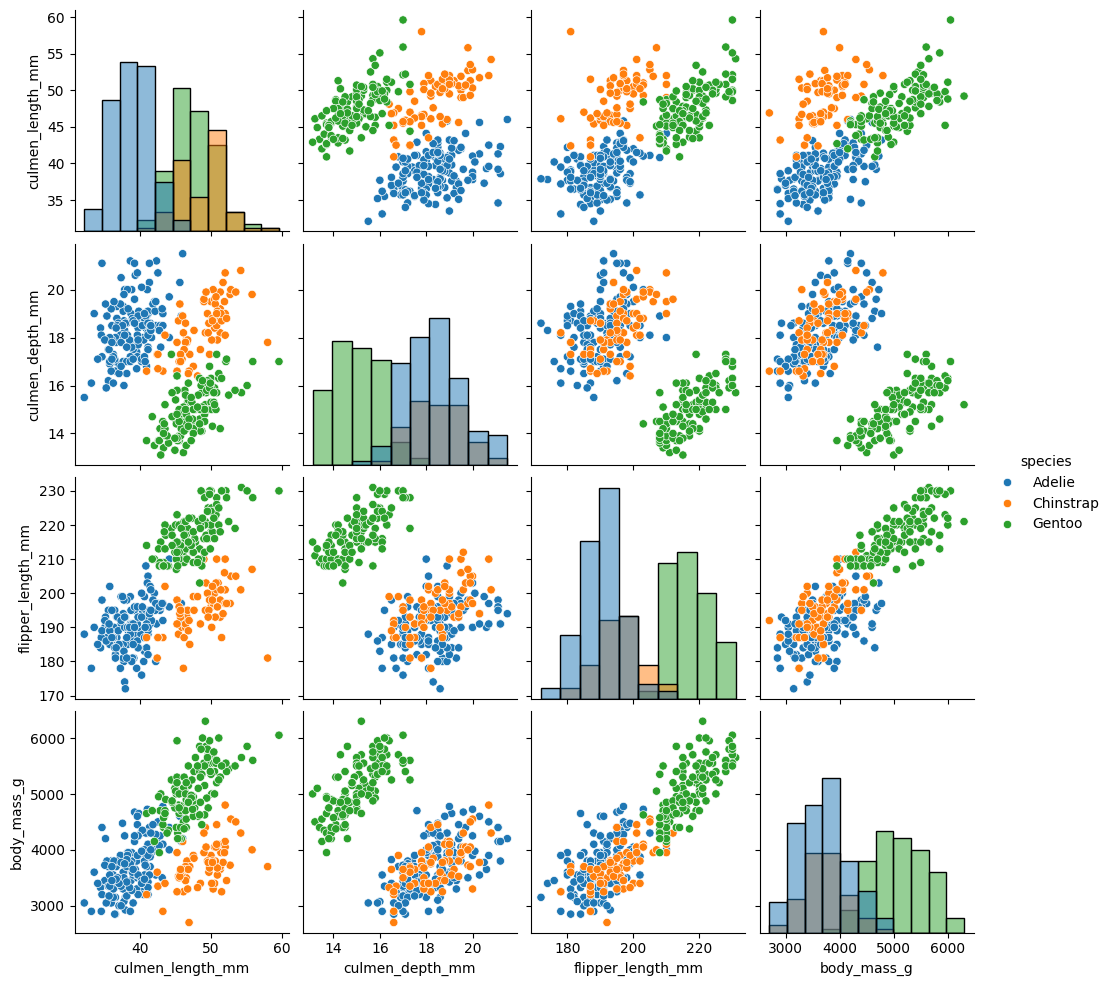

In [166]:
# Display pairplot for visualization
print("\nPairplot for data visualization:")
sns.pairplot(df, hue='species', height=2.5, diag_kind='hist')
plt.show()

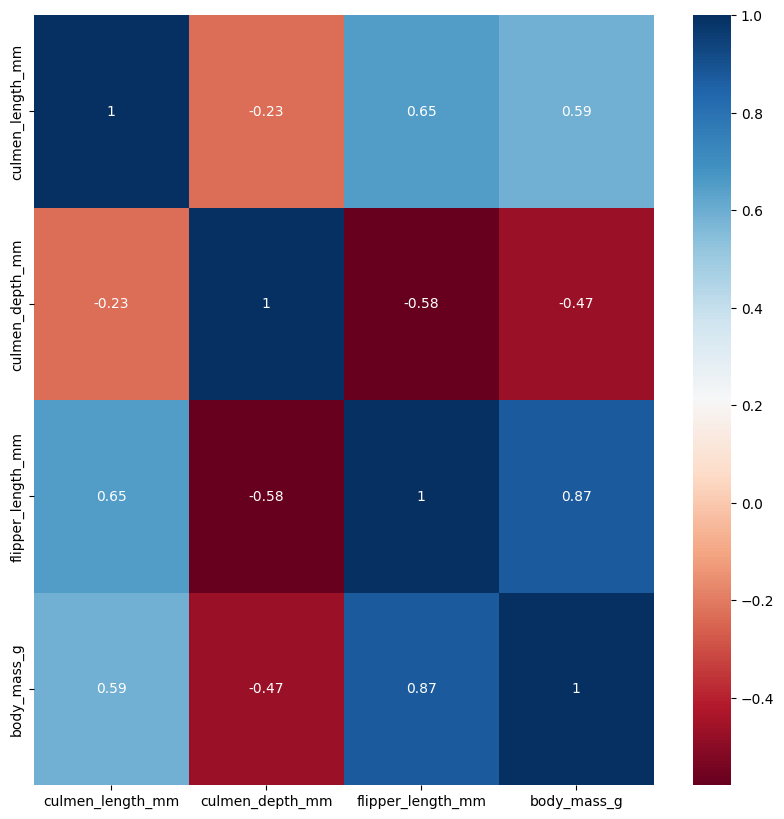

In [167]:
# only numeric columns
numeric_df = df.select_dtypes(include=[np.number])

# Calculating the correlation matrix
corr_matrix = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(corr_matrix, annot=True, cmap='RdBu')
plt.show()

In [168]:
# Split the data into training and testing sets
train, test = train_test_split(df, test_size=0.2, random_state=42)
print("\nData split into training and testing sets:")
print("Training set shape:", train.shape)
print("Testing set shape:", test.shape)


Data split into training and testing sets:
Training set shape: (267, 7)
Testing set shape: (67, 7)


In [169]:
# Separate features and target variable
train_y = train['species']
test_y = test['species']
train_x = train.drop(['species'], axis=1)
test_x = test.drop(['species'], axis=1)

In [170]:
# first few rows of train_x and train_y
print("\nFirst few rows of train_x:")
print(train_x.head(5))
print("\nFirst few rows of train_y:")
print(train_y.head())


First few rows of train_x:
     island  culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
230  Biscoe              40.9             13.7              214.0   
84    Dream              37.3             17.8              191.0   
303  Biscoe              50.0             15.9              224.0   
22   Biscoe              35.9             19.2              189.0   
29   Biscoe              40.5             18.9              180.0   

     body_mass_g     sex  
230       4650.0  FEMALE  
84        3350.0  FEMALE  
303       5350.0    MALE  
22        3800.0  FEMALE  
29        3950.0    MALE  

First few rows of train_y:
230    Gentoo
84     Adelie
303    Gentoo
22     Adelie
29     Adelie
Name: species, dtype: object


In [171]:
# Identify categorical columns
categorical_features = train_x.select_dtypes(include=['object']).columns

In [172]:
# Creating ColumnTransformer to apply OneHotEncoder to categorical columns
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ],
    remainder='passthrough'  # Leave the remaining columns (numeric ones) unchanged
)

In [173]:
# Creating a pipeline that first transforms the data then fits the SVM model
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', svm.SVC(kernel='linear'))
])

In [ ]:
# Performing cross-validation
cv_scores = cross_val_score(model_pipeline, train_x, train_y, cv=5)

print("Cross-validation scores:", cv_scores)
print("Mean cross-validation score:", cv_scores.mean())

In [174]:
# Fit the model
model_pipeline.fit(train_x, train_y)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['island', 'sex'], dtype='object'))])),
                ('classifier', SVC(kernel='linear'))])

In [175]:
# Make predictions
predictions = model_pipeline.predict(test_x)

In [176]:
# Calculating accuracy
accuracy = metrics.accuracy_score(predictions, test_y)
print("\nModel Accuracy:", accuracy)


Model Accuracy: 1.0


## Conclusion:
* The SVM classifier was trained on the Palmer Archipelago (Antarctica) penguin dataset.
* The model achieved an accuracy of 1.0 (100%) on the test set, indicating perfect performance on this particular dataset.
* While a perfect accuracy score is impressive, it is essential to ensure that the model generalizes well to new, unseen data to avoid overfitting.
* Cross-validation and other validation techniques can be employed to validate the model's robustness and generalization capability.
* This demonstrates the capability of SVMs in classifying penguin species based on their physical measurements, though further validation is recommended to confirm these results.